# Wczytywanie

In [1]:
import matplotlib.pyplot as plt
import pandas

def read_pickle(file_path):
    file = pandas.read_pickle(file_path)
    return file

In [2]:
stan_wody = read_pickle("data/data_imgw/B00020S.pkl")

# Filtracja danych

In [3]:
stan_wody = stan_wody[stan_wody["Station"]=="GŁOGÓW"]
stan_wody = stan_wody.dropna()

In [4]:
stan_wody["Date"]=pandas.to_datetime(stan_wody["Date"])

In [5]:
stan_wody["Year"]=stan_wody["Date"].dt.year
stan_wody["Month"]=stan_wody["Date"].dt.month
def zamien_przecinek_na_kropke(wartosc):
    if "," in str(wartosc):
        return str(wartosc).replace(",", ".")
    else:
        return wartosc

# Zastosuj funkcję do kolumny 'nazwa_kolumny'
stan_wody["B00020S"] = stan_wody["B00020S"].apply(zamien_przecinek_na_kropke)

# Zmień typ danych na float (opcjonalne)
stan_wody["B00020S"] = pandas.to_numeric(stan_wody["B00020S"], errors="coerce")
stan_wody

,ID,Station,River,Date,Time,B00020S,Year,Month
284375,151160060,GŁOGÓW,Odra,2008-01-01,00:00:00,257.84,2008,1
284376,151160060,GŁOGÓW,Odra,2008-01-01,00:10:00,257.31,2008,1
284377,151160060,GŁOGÓW,Odra,2008-01-01,00:20:00,257.58,2008,1
284378,151160060,GŁOGÓW,Odra,2008-01-01,00:30:00,256.68,2008,1
284379,151160060,GŁOGÓW,Odra,2008-01-01,00:40:00,257.31,2008,1
...,...,...,...,...,...,...,...,...
57346516,151160060,GŁOGÓW,Odra,2023-09-30,23:10:00,205.00,2023,9
57346517,151160060,GŁOGÓW,Odra,2023-09-30,23:20:00,205.00,2023,9
57346518,151160060,GŁOGÓW,Odra,2023-09-30,23:30:00,205.00,2023,9
57346519,151160060,GŁOGÓW,Odra,2023-09-30,23:40:00,205.00,2023,9


In [6]:
def df(stan_wody):
    ramki_danych = []

    for year in range(2008,2024):
        dane_rok = stan_wody[stan_wody["Year"] == year]
        gruped = dane_rok.groupby("Month")
        dane_rok["avg_B00020S"] = gruped["B00020S"].transform("mean")
        ramki_danych.append(dane_rok)

    return ramki_danych

data_frame = df(stan_wody)
len(data_frame)

C:\Users\justa\AppData\Local\Temp\ipykernel_7780\663577914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_rok["avg_B00020S"] = gruped["B00020S"].transform("mean")
C:\Users\justa\AppData\Local\Temp\ipykernel_7780\663577914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_rok["avg_B00020S"] = gruped["B00020S"].transform("mean")
C:\Users\justa\AppData\Local\Temp\ipykernel_7780\663577914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

16

# Wykres

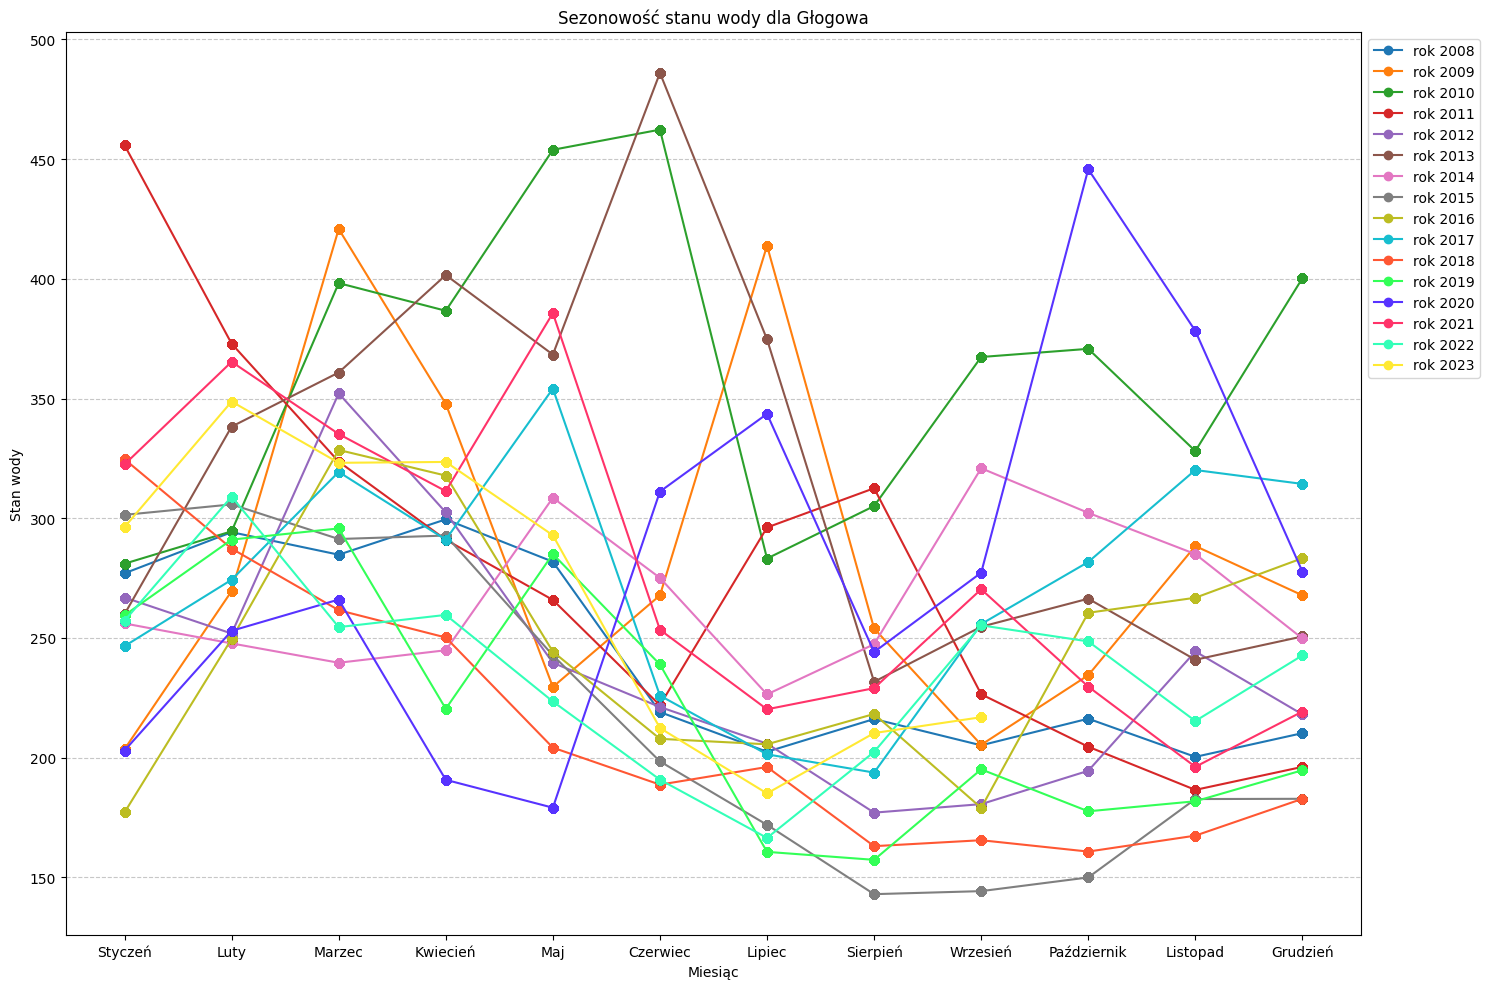

In [13]:
# Tworzenie figury o określonym rozmiarze
plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF5733', '#33FF57', '#5733FF', '#FF3369', '#33FFB8', '#FFE933']


# Iteracja przez lata w ramce danych
for i, year in enumerate(range(2008, 2024)):
    df_year = data_frame[year - 2008]
    plt.plot(df_year["Month"], df_year["avg_B00020S"], linestyle='-', marker="o", label=f'rok {year}', color=colors[i])

# Dodanie tytułu i etykiet osi
plt.title('Sezonowość stanu wody dla Głogowa')
plt.xlabel('Miesiąc')
plt.ylabel('Stan wody')

# Dodanie legendy w górnym lewym rogu
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Ustawienie etykiet na osi X i dodanie siatki
plt.xticks(range(1, 13), ["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Automatyczne dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

# Wykres dla 5 ostatnich lat

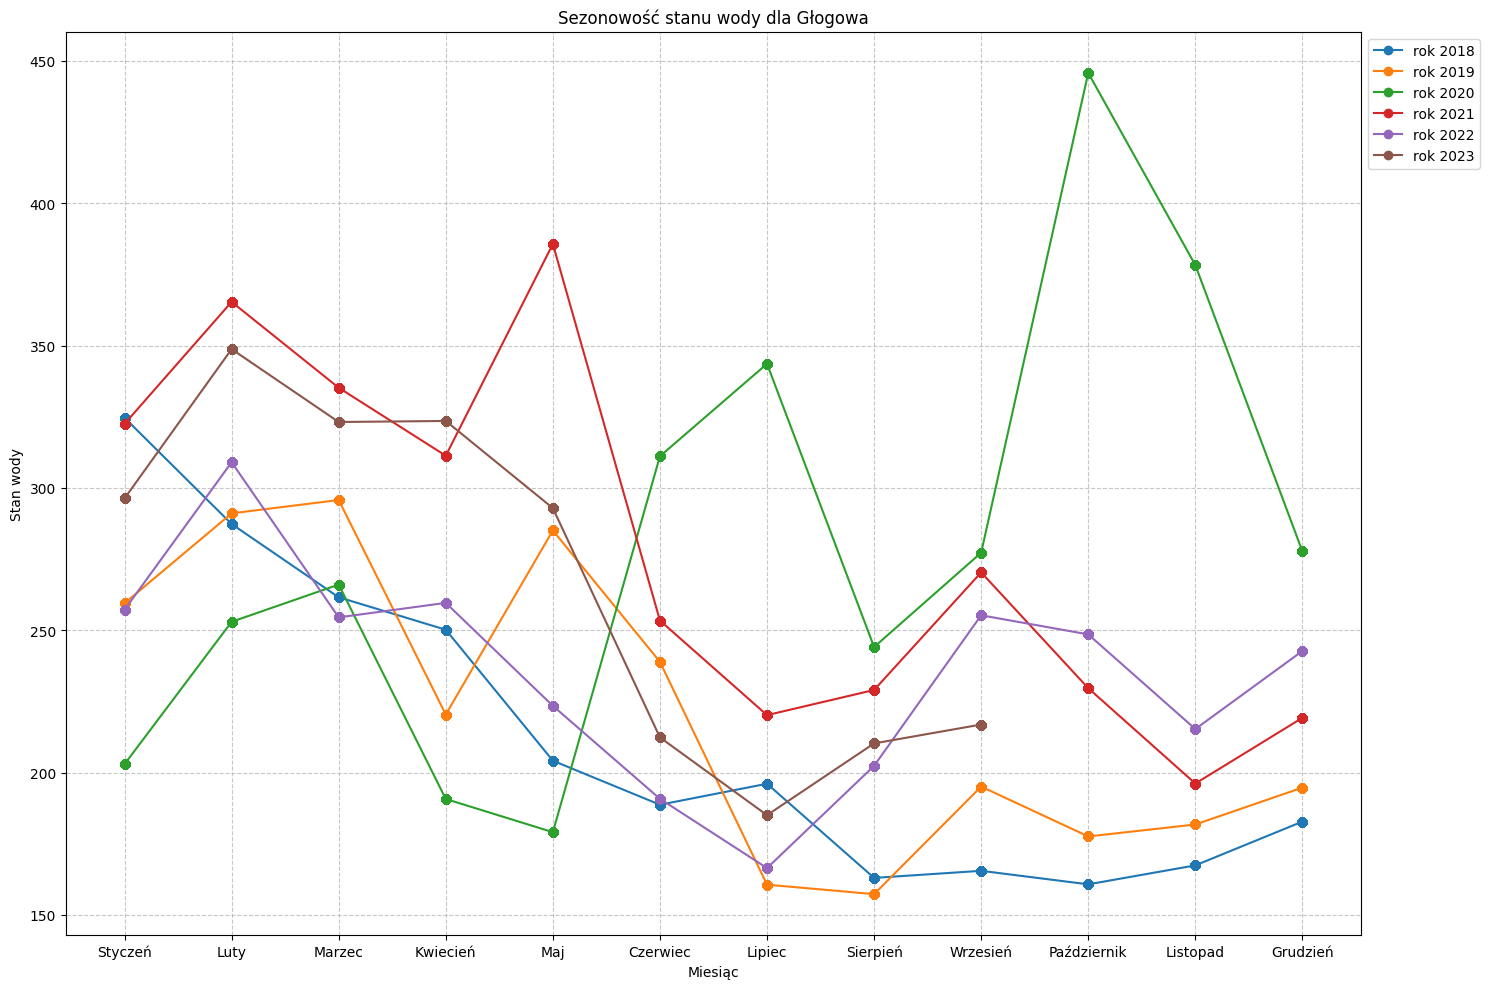

In [12]:
# Tworzenie figury o określonym rozmiarze
plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


# Iteracja przez lata w ramce danych
for i, year in enumerate(range(2018, 2024)):
    df_year = data_frame[year - 2008]
    plt.plot(df_year["Month"], df_year["avg_B00020S"], linestyle='-', marker="o", label=f'rok {year}', color=colors[i])

# Dodanie tytułu i etykiet osi
plt.title('Sezonowość stanu wody dla Głogowa')
plt.xlabel('Miesiąc')
plt.ylabel('Stan wody')

# Dodanie legendy w górnym lewym rogu
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Ustawienie etykiet na osi X i dodanie siatki
plt.xticks(range(1, 13), ["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"])
plt.grid(linestyle='--', alpha=0.7)

# Automatyczne dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()